# 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


In [3]:
ords_prods_flagged = pd.read_pickle(r'/Users/nayeraibrahim/Documents/CF assignments/Python/27-10-2020 Instacart Basket Analysis/02 Data/Prepared Data/ orders_products_merged_flagged.pkl')


# bar chart

<AxesSubplot:>

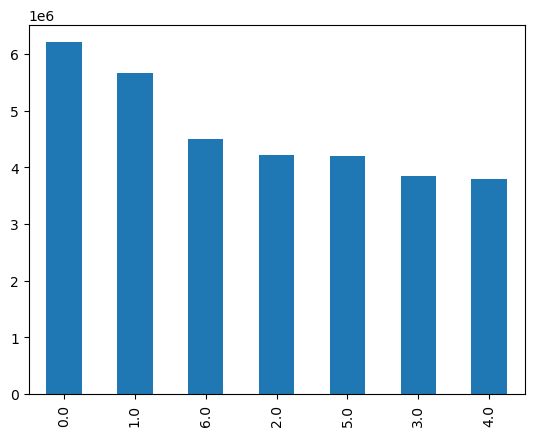

In [4]:
ords_prods_flagged['order_dow'].value_counts().plot.bar()


Text(0, 0.5, 'Count (10^6)')

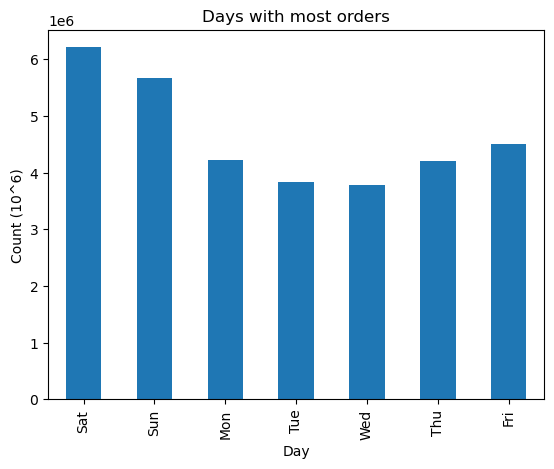

In [12]:
bar=ords_prods_flagged['order_dow'].value_counts().sort_index().plot.bar()
plt.xticks((0, 1, 2, 3, 4, 5, 6), ('Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri'))
plt.title("Days with most orders")
plt.xlabel("Day")
plt.ylabel("Count (10^6)")

In [7]:
ords_prods_flagged['order_dow'].value_counts().sort_index()

0.0    6210030
1.0    5666177
2.0    4218024
3.0    3844342
4.0    3787414
5.0    4209718
6.0    4500536
Name: order_dow, dtype: int64

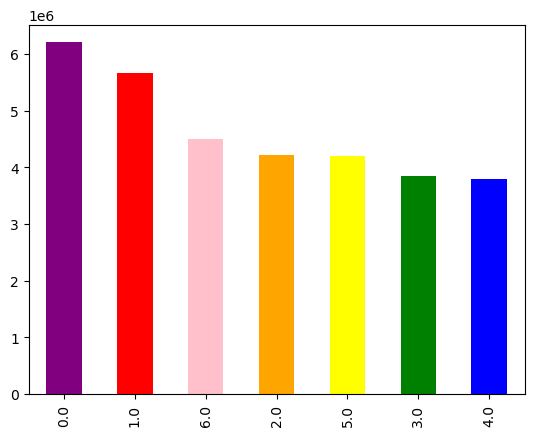

In [8]:
bar = ords_prods_flagged['order_dow'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])


In [11]:
bar.figure.savefig(r'/Users/nayeraibrahim/Documents/CF assignments/Python/27-10-2020 Instacart Basket Analysis/04 Analysis/Visualisations/bar_orders_dow.png')

# histogram

<AxesSubplot:ylabel='Frequency'>

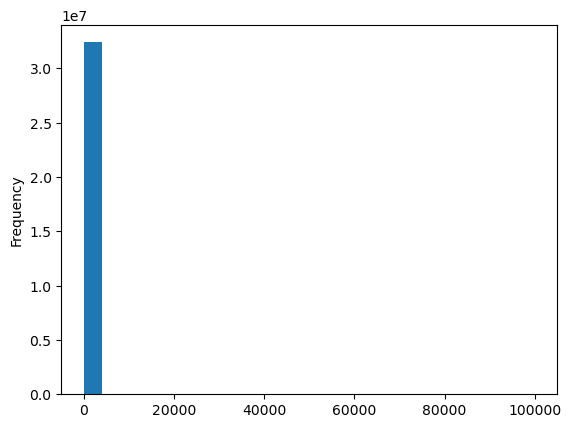

In [12]:
ords_prods_flagged['prices'].plot.hist(bins = 25)


# scatterplot

<AxesSubplot:xlabel='prices', ylabel='prices'>

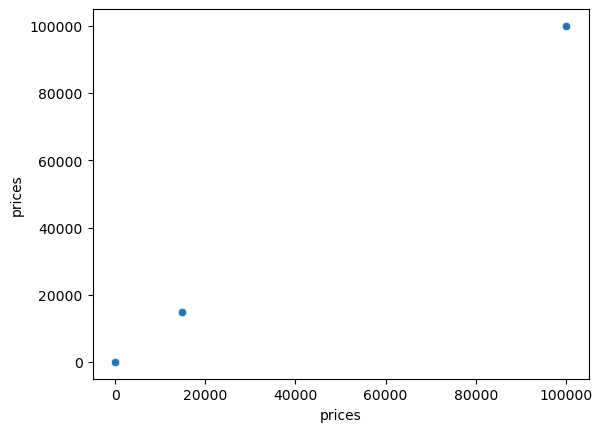

In [13]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_flagged)


In [15]:
ords_prods_flagged.loc[ords_prods_flagged['prices'] > 100]


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,aisle_id,department_id,prices,_merge2,max_order,loyalty_flag,avg_price,spender_flag,cust_reg,frequent_flag
10030345,912404.0,17.0,prior,12.0,2.0,14.0,5.0,21553,5.0,0.0,...,108.0,16.0,14900.0,both,40.0,Regular customer,108.648299,high spender,5.0,frequent customer
10030346,603376.0,17.0,prior,22.0,6.0,16.0,4.0,21553,3.0,1.0,...,108.0,16.0,14900.0,both,40.0,Regular customer,108.648299,high spender,5.0,frequent customer
10030347,3264360.0,135.0,prior,2.0,2.0,21.0,13.0,21553,6.0,0.0,...,108.0,16.0,14900.0,both,4.0,New customer,1154.792308,high spender,12.0,Regular customer
10030348,892534.0,135.0,prior,3.0,0.0,8.0,12.0,21553,3.0,1.0,...,108.0,16.0,14900.0,both,4.0,New customer,1154.792308,high spender,12.0,Regular customer
10030349,229704.0,342.0,prior,8.0,1.0,19.0,30.0,21553,9.0,0.0,...,108.0,16.0,14900.0,both,16.0,Regular customer,114.426619,high spender,23.0,non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29195246,2249946.0,204099.0,prior,29.0,0.0,8.0,4.0,33664,1.0,0.0,...,84.0,16.0,99999.0,both,39.0,Regular customer,1106.743956,high spender,4.0,frequent customer
29195247,2363282.0,204099.0,prior,31.0,0.0,9.0,2.0,33664,1.0,1.0,...,84.0,16.0,99999.0,both,39.0,Regular customer,1106.743956,high spender,4.0,frequent customer
29195248,3181945.0,204395.0,prior,13.0,3.0,15.0,8.0,33664,25.0,0.0,...,84.0,16.0,99999.0,both,15.0,Regular customer,451.153540,high spender,5.0,frequent customer
29195249,2486215.0,205227.0,prior,7.0,3.0,20.0,4.0,33664,8.0,0.0,...,84.0,16.0,99999.0,both,12.0,Regular customer,1178.381871,high spender,12.0,Regular customer


In [16]:
ords_prods_flagged.loc[ords_prods_flagged['prices'] >100, 'prices'] = np.nan


In [17]:
ords_prods_flagged['prices'].max()

25.0

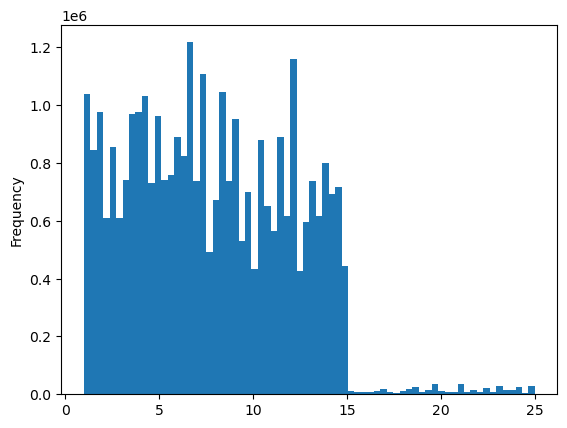

In [19]:
hist=ords_prods_flagged['prices'].plot.hist(bins = 70)


In [20]:
hist.figure.savefig(r'/Users/nayeraibrahim/Documents/CF assignments/Python/27-10-2020 Instacart Basket Analysis/04 Analysis/Visualisations/hist_prices.png')

In [21]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_flagged)) <= 0.7

In [22]:
dev

array([False,  True, False, ..., False,  True,  True])

In [24]:
len(ords_prods_flagged)

32436252

In [25]:
np.random.rand(2)

array([0.68847973, 0.43470802])

In [26]:
ords_prods_flagged.head(1)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,aisle_id,department_id,prices,_merge2,max_order,loyalty_flag,avg_price,spender_flag,cust_reg,frequent_flag
0,2539329.0,1.0,prior,1.0,2.0,8.0,NaN,196,1.0,0.0,...,77.0,7.0,9.0,both,10.0,New customer,6.367797,low spender,20.5,non-frequent customer


In [28]:
big = ords_prods_flagged[dev]
small = ords_prods_flagged[~dev]

In [30]:
df_2 = small[['order_dow','prices']]

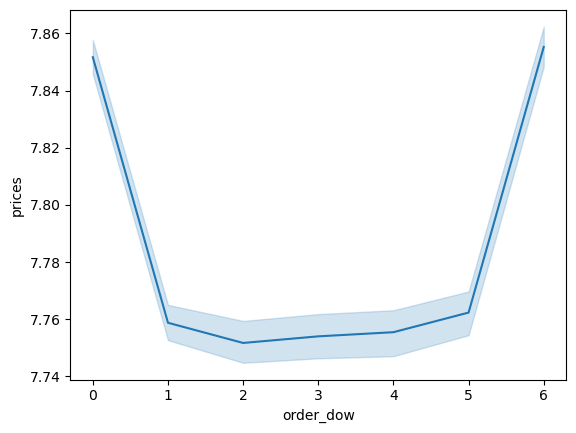

In [31]:
line = sns.lineplot(data = df_2, x = 'order_dow',y = 'prices')